In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("advertising.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [27]:
data.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,date,time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,2016-05-19,14:30:17
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,2016-01-28,20:59:32
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,2016-03-07,01:40:15
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,2016-04-18,09:33:42
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,2016-07-11,01:42:51


In [13]:
data[["date","time"]] = data["Timestamp"].str.split(" ",expand=True)

In [15]:
df = data.drop(columns=["Timestamp"])
df.head(1)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,date,time
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016-03-27,00:53:11


In [16]:
df.isna().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Clicked on Ad,0
date,0


In [23]:
c=df.select_dtypes("number").drop(columns=["Male","Clicked on Ad"]).corr()

<Axes: >

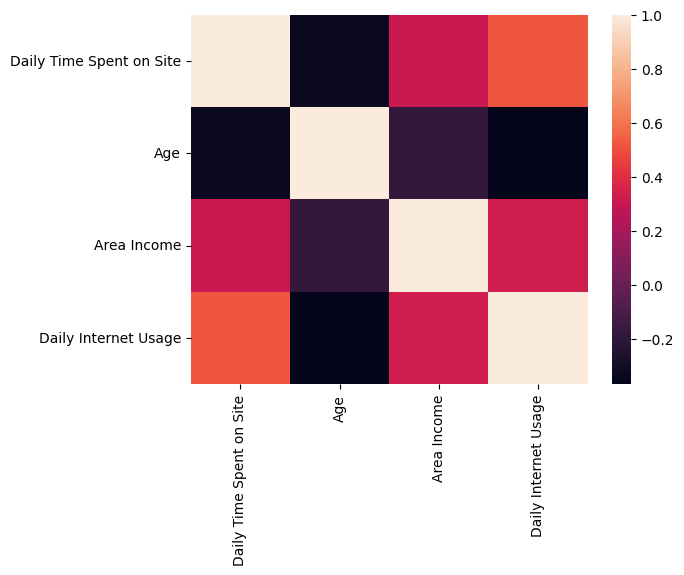

In [24]:
sns.heatmap(c)

In [25]:
df["Clicked on Ad"].value_counts()

,count
Clicked on Ad,
0,500
1,500


In [26]:
df.select_dtypes("object").nunique()

,0
Ad Topic Line,1000
City,969
Country,237
date,203
time,995


In [28]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Clicked on Ad', 'date', 'time'],
      dtype='object')

In [29]:
features=['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']
X= df[features]
y=df["Clicked on Ad"]

In [30]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [36]:
training_accuracy = accuracy_score(y_train,model.predict(X_train))
print(f"Training Accuracy: {training_accuracy}")
testing_accuracy = accuracy_score(y_test,model.predict(X_test))
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.97625
Testing Accuracy: 0.96


In [37]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 86,   3],
       [  5, 106]])

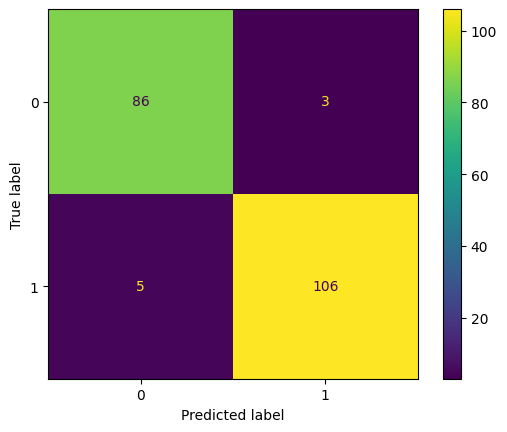

In [44]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [45]:
classification_report(y_test,model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96        89\n           1       0.97      0.95      0.96       111\n\n    accuracy                           0.96       200\n   macro avg       0.96      0.96      0.96       200\nweighted avg       0.96      0.96      0.96       200\n'

Text(0.5, 0, 'odds ratio')

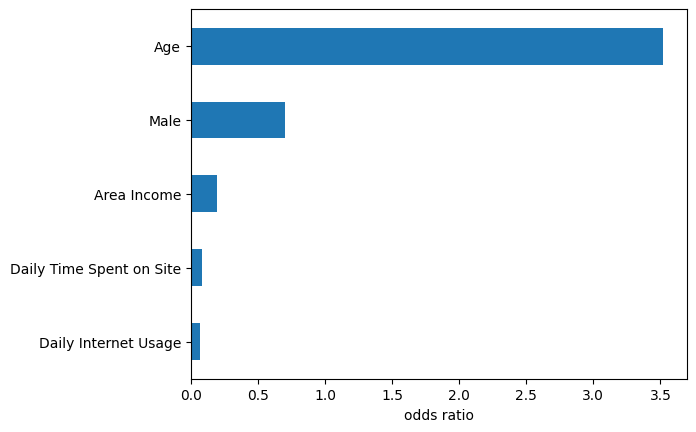

In [51]:
feat = X_train.columns
imp = model.named_steps["logisticregression"].coef_[0]
feat_imp = pd.Series(np.exp(imp),index=feat).sort_values(ascending=True)
feat_imp.plot(kind="barh");
plt.xlabel("odds ratio")